
<div class="alert alert-info">

**This is a fixed-text formatted version of a Jupyter notebook**

- Try online [![Binder](https://static.mybinder.org/badge.svg)](https://mybinder.org/v2/gh/gammapy/gammapy-webpage/v0.18.2?urlpath=lab/tree/catalog.ipynb)
- You can contribute with your own notebooks in this
[GitHub repository](https://github.com/gammapy/gammapy/tree/master/docs/tutorials).
- **Source files:**
[catalog.ipynb](../_static/notebooks/catalog.ipynb) |
[catalog.py](../_static/notebooks/catalog.py)
</div>


# Source catalogs

`~gammapy.catalog` provides convenient access to common gamma-ray source catalogs. E.g. creating a spectral model and spectral points for a given Fermi-LAT catalog and source from the FITS table is tedious, `~gammapy.catalog` has this implemented and makes it easy.

In this tutorial you will learn how to:

- List available catalogs
- Load a catalog
- Select a source
- Pretty-print the source information
- Get source spectral and spatial models
- Get flux points (if available)
- Get lightcurves (if available)
- Access the source catalog table data

In this tutorial we will show examples using the following catalogs:

- `~gammapy.catalog.SourceCatalogHGPS`
- `~gammapy.catalog.SourceCatalogGammaCat`
- `~gammapy.catalog.SourceCatalog3FHL`
- `~gammapy.catalog.SourceCatalog4FGL`

All catalog and source classes work the same, as long as some information is available. E.g. trying to access a lightcurve from a catalog and source that doesn't have that information will return ``None``.

Further information is available at `~gammapy.catalog`.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
import astropy.units as u
from gammapy.catalog import CATALOG_REGISTRY

## List available catalogs

`~gammapy.catalog` contains a catalog registry ``CATALOG_REGISTRY``, which maps catalog names (e.g. "3fhl") to catalog classes (e.g. ``SourceCatalog3FHL``). 

In [3]:
CATALOG_REGISTRY

[gammapy.catalog.gammacat.SourceCatalogGammaCat,
 gammapy.catalog.hess.SourceCatalogHGPS,
 gammapy.catalog.hawc.SourceCatalog2HWC,
 gammapy.catalog.fermi.SourceCatalog3FGL,
 gammapy.catalog.fermi.SourceCatalog4FGL,
 gammapy.catalog.fermi.SourceCatalog2FHL,
 gammapy.catalog.fermi.SourceCatalog3FHL]

In [4]:
list(CATALOG_REGISTRY)

[gammapy.catalog.gammacat.SourceCatalogGammaCat,
 gammapy.catalog.hess.SourceCatalogHGPS,
 gammapy.catalog.hawc.SourceCatalog2HWC,
 gammapy.catalog.fermi.SourceCatalog3FGL,
 gammapy.catalog.fermi.SourceCatalog4FGL,
 gammapy.catalog.fermi.SourceCatalog2FHL,
 gammapy.catalog.fermi.SourceCatalog3FHL]

## Load catalogs

If you have run `gammapy download datasets` or `gammapy download tutorials`,
you have a copy of the catalogs as FITS files in `$GAMMAPY_DATA/catalogs`,
and that is the default location where `~gammapy.catalog` loads from.

You can load a catalog by name via `CATALOG_REGISTRY.get_cls(name)()` (note the `()` to instantiate a catalog object from the catalog class - only this will load the catalog and be useful), or by importing the catalog class (e.g. `SourceCatalog3FGL`) directly. The two ways are equivalent, the result will be the same.

Note that `$GAMMAPY_DATA/catalogs` is just the default, you could pass a different `filename` when creating the catalog.

In [5]:
!ls -1 $GAMMAPY_DATA/catalogs

2HWC.ecsv
2HWC.yaml
README.rst
fermi
gammacat
hgps_catalog_v1.fits.gz
make_2hwc.py


In [6]:
# Catalog object - FITS file is loaded
catalog = CATALOG_REGISTRY.get_cls("3fgl")()
catalog

In [7]:
from gammapy.catalog import SourceCatalog3FGL

catalog = SourceCatalog3FGL()
catalog

In [8]:
# Let's load the source catalogs we will use throughout this tutorial
catalog_gammacat = CATALOG_REGISTRY.get_cls("gamma-cat")()
catalog_3fhl = CATALOG_REGISTRY.get_cls("3fhl")()
catalog_4fgl = CATALOG_REGISTRY.get_cls("4fgl")()
catalog_hgps = CATALOG_REGISTRY.get_cls("hgps")()

## Select a source

To create a source object, index into the catalog using `[]`, passing a catalog table row index (zero-based, first row is `[0]`), or a source name. If passing a name, catalog table columns with source names and association names ("ASSOC1" in the example below) are searched top to bottom. There is no name resolution web query.

In [9]:
source = catalog_4fgl[42]
source

In [10]:
source.row_index, source.name

(42, '4FGL J0010.8-2154')

In [11]:
source = catalog_4fgl["4FGL J0010.8-2154"]
source

In [12]:
source.row_index, source.name

(42, '4FGL J0010.8-2154')

In [13]:
source.data["ASSOC1"]

'PKS 0008-222                '

In [14]:
source = catalog_4fgl["PKS 0008-222"]
source.row_index, source.name

(42, '4FGL J0010.8-2154')

## Pretty-print source information

A source object has a nice string representation that you can print.
You can also call `source.info()` instead and pass an option what information to print.

In [15]:
source = catalog_hgps["MSH 15-52"]
print(source)


*** Basic info ***

Catalog row index (zero-based) : 18
Source name          : HESS J1514-591
Analysis reference   : HGPS
Source class         : PWN
Identified object    : MSH 15-52
Gamma-Cat id         : 79


*** Info from map analysis ***

RA                   :  228.499 deg = 15h14m00s
DEC                  :  -59.161 deg = -59d09m41s
GLON                 :  320.315 +/- 0.008 deg
GLAT                 :   -1.188 +/- 0.007 deg
Position Error (68%) : 0.020 deg
Position Error (95%) : 0.033 deg
ROI number           : 13
Spatial model        : 3-Gaussian
Spatial components   : HGPSC 023, HGPSC 024, HGPSC 025
TS                   : 1763.4
sqrt(TS)             : 42.0
Size                 : 0.145 +/- 0.026 (UL: nan) deg
R70                  : 0.215 deg
RSpec                : 0.215 deg
Total model excess   : 3502.8
Excess in RSpec      : 2440.5
Model Excess in RSpec : 2414.3
Background in RSpec  : 1052.5
Livetime             : 41.4 hours
Energy threshold     : 0.61 TeV
Source flux (>1 TeV) : 

In [16]:
print(source.info("associations"))


*** Source associations info ***

  Source_Name    Association_Catalog    Association_Name   Separation
                                                              deg    
---------------- ------------------- --------------------- ----------
  HESS J1514-591                2FHL    2FHL J1514.0-5915e   0.098903
  HESS J1514-591                3FGL     3FGL J1513.9-5908   0.026914
  HESS J1514-591                3FGL    3FGL J1514.0-5915e   0.094834
  HESS J1514-591                COMP            G320.4-1.2   0.070483
  HESS J1514-591                 PSR              B1509-58   0.026891



## Source models

The `~gammapy.catalog.SourceCatalogObject` classes have a `sky_model()` model
which creates a `gammapy.modeling.models.SkyModel` object, with model parameter
values and parameter errors from the catalog filled in.

In most cases, the `spectral_model()` method provides the `gammapy.modeling.models.SpectralModel`
part of the sky model, and the `spatial_model()` method the `gammapy.modeling.models.SpatialModel`
part individually.

We use the `gammapy.catalog.SourceCatalog3FHL` for the examples in this section.

In [17]:
source = catalog_4fgl["PKS 2155-304"]

In [18]:
model = source.sky_model()
model

SkyModel(spatial_model=<gammapy.modeling.models.spatial.PointSpatialModel object at 0x11ff39ac8>, spectral_model=<gammapy.modeling.models.spectral.LogParabolaSpectralModel object at 0x11ffb3748>)temporal_model=None)

In [19]:
print(model)

SkyModel

  Name                      : 4FGL J2158.8-3013
  Datasets names            : None
  Spectral model type       : LogParabolaSpectralModel
  Spatial  model type       : PointSpatialModel
  Temporal model type       : 
  Parameters:
    amplitude               :   1.38e-05  1 / (cm2 s TeV)
    reference    (frozen)   :   0.001  TeV         
    alpha                   :   1.763              
    beta                    :   0.042              
    lon_0                   : 329.714  deg         
    lat_0                   : -30.225  deg         




In [20]:
print(model.spatial_model)

PointSpatialModel

 name    value    unit    min        max    frozen   error  
----- ----------- ---- ---------- --------- ------ ---------
lon_0  3.2971e+02  deg        nan       nan  False 3.735e-03
lat_0 -3.0225e+01  deg -9.000e+01 9.000e+01  False 3.227e-03


In [21]:
print(model.spectral_model)

LogParabolaSpectralModel

   name     value         unit      min max frozen   error  
--------- ---------- -------------- --- --- ------ ---------
amplitude 1.3769e-05 cm-2 s-1 TeV-1 nan nan  False 1.801e-07
reference 1.1365e-03            TeV nan nan   True 0.000e+00
    alpha 1.7632e+00                nan nan  False 1.332e-02
     beta 4.1718e-02                nan nan  False 4.680e-03


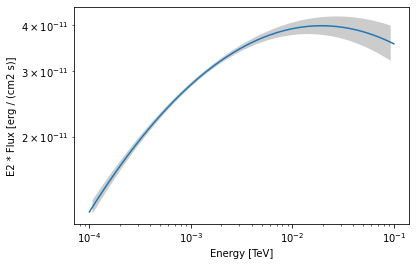

In [22]:
energy_range = (100 * u.MeV, 100 * u.GeV)
opts = dict(energy_power=2, flux_unit="erg-1 cm-2 s-1")
model.spectral_model.plot(energy_range, **opts)
model.spectral_model.plot_error(energy_range, **opts)

## Flux points

The flux points are available via the `flux_points` property as a `gammapy.spectrum.FluxPoints` object.

In [23]:
source = catalog_4fgl["PKS 2155-304"]
flux_points = source.flux_points

In [24]:
flux_points

FluxPoints(sed_type='flux', n_points=7)

In [25]:
flux_points.table[["e_min", "e_max", "flux", "flux_errn"]]

e_min,e_max,flux,flux_errn
MeV,MeV,1 / (cm2 s),1 / (cm2 s)
float64,float64,float32,float32
50.0,100.0,7.72853e-08,4.0041947e-08
100.0,300.0,6.633264e-08,3.3468415e-09
300.0,1000.0,3.2824694e-08,6.9634254e-10
1000.0,3000.0,1.2609229e-08,2.4615918e-10
3000.0,10000.0,5.407803e-09,1.3989285e-10
10000.0,30000.0,1.7188525e-09,7.4735836e-11
30000.0,300000.0,6.818578e-10,4.5728827e-11


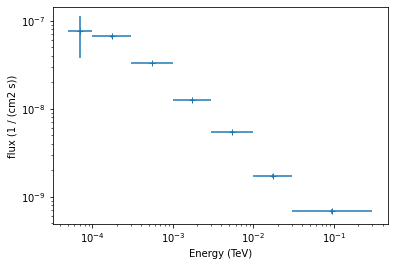

In [26]:
flux_points.plot()

## Lightcurves

The Fermi catalogs contain lightcurves for each source. It is available via the `source.lightcurve` property as a `~gammapy.time.LightCurve` object.

In [27]:
lightcurve = catalog_4fgl["4FGL J0349.8-2103"].lightcurve

In [28]:
lightcurve

LightCurve(len=8)

In [29]:
lightcurve.table[:3]

time_min,time_max,flux,flux_errp,flux_errn
,,1 / (cm2 s),1 / (cm2 s),1 / (cm2 s)
float64,float64,float32,float32,float32
54682.655277777776,55047.603239293836,8.4104094e-08,4.119689e-09,4.119689e-09
55047.603239293836,55412.55121238397,3.6117186e-08,3.434389e-09,3.434389e-09
55412.55121238397,55777.4991854741,1.4224756e-08,2.7470255e-09,2.6878597e-09


No handles with labels found to put in legend.


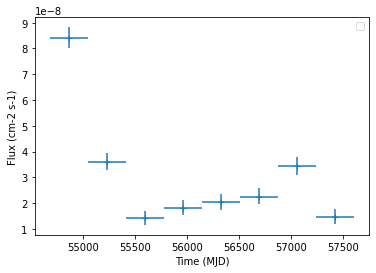

In [30]:
lightcurve.plot()

## Catalog table and source dictionary

Source catalogs are given as `FITS` files that contain one or multiple tables.
Above we showed how to get spectra, light curves and other information as Gammapy objects.

However, you can also access the underlying `astropy.table.Table` for a catalog,
and the row data as a Python `dict`. This can be useful if you want to do something
that is not pre-scripted by the `~gammapy.catalog` classes, such as e.g. selecting
sources by sky position or association class, or accessing special source information
(like e.g. `Npred` in the example below).

Note that you can also do a `for source in catalog` loop, to find or process
sources of interest.

In [31]:
type(catalog_3fhl.table)

astropy.table.table.Table

In [32]:
len(catalog_3fhl.table)

1556

In [33]:
catalog_3fhl.table[:3][["Source_Name", "RAJ2000", "DEJ2000"]]

Source_Name,RAJ2000,DEJ2000
,deg,deg
bytes18,float32,float32
3FHL J0001.2-0748,0.3107,-7.8075
3FHL J0001.9-4155,0.4849,-41.9303
3FHL J0002.1-6728,0.5283,-67.4825


In [34]:
source = catalog_3fhl["PKS 2155-304"]

In [35]:
source.data["Source_Name"]

'3FHL J2158.8-3013 '

In [36]:
source.data["Npred"]

678.95544

In [37]:
source.position

<SkyCoord (ICRS): (ra, dec) in deg
    (329.71694946, -30.22418594)>

In [38]:
# Find the brightest sources in the 100 to 200 GeV energy band
for source in catalog_3fhl:
    flux = (
        source.spectral_model()
        .integral(100 * u.GeV, 200 * u.GeV)
        .to("cm-2 s-1")
    )
    if flux > 1e-10 * u.Unit("cm-2 s-1"):
        print(f"{source.row_index:<7d} {source.name:20s} {flux:.3g}")

352     3FHL J0534.5+2201    2.99e-10 1 / (cm2 s)
553     3FHL J0851.9-4620e   1.24e-10 1 / (cm2 s)
654     3FHL J1036.3-5833e   1.57e-10 1 / (cm2 s)
691     3FHL J1104.4+3812    3.34e-10 1 / (cm2 s)
1111    3FHL J1653.8+3945    1.27e-10 1 / (cm2 s)
1219    3FHL J1824.5-1351e   1.77e-10 1 / (cm2 s)
1361    3FHL J2028.6+4110e   1.75e-10 1 / (cm2 s)


## Exercises

- How many sources are in the 4FGL catalog? (try `len(catalog.table)`
- What is the name of the source with row index 42?
- What is the row index of the source with name "4FGL J0536.1-1205"?
- What is the integral flux of "4FGL J0536.1-1205" in the energy range 100 GeV to 1 TeV according to the best-fit spectral model?
- Which source in the HGPS catalog is closest to Galactic position `glon = 42 deg` and `glat = 0 deg`?

In [39]:
# Start coding here ...

## Next steps

`~gammapy.catalog` is mostly independent from the rest of Gammapy.
Typically you use it to compare new analyses against catalog results, e.g. overplot the spectral model, or compare the source position.

You can also use `~gammapy.catalog` in your scripts to create initial source models for your analyses.
This is very common for Fermi-LAT, to start with a catalog model.
For TeV analysis, especially in crowded Galactic regions, using the HGPS, gamma-cat or 2HWC catalog in this way can also be useful.
